In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, log_loss


In [2]:
#Importing dataset
folder = 'C:/Users/Acer/Downloads/Data/'
dataset = pd.read_csv(folder + 'housing_prices.csv')

In [3]:
print(dataset.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SalePrice  Condition  
0   2008        WD     20

In [4]:
missing = dataset.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [5]:
#fill du lieu thieu nhieu
dataset['PoolQC'] = dataset['PoolQC'].fillna('None')
dataset['MiscFeature'] = dataset['MiscFeature'].fillna('None')
dataset['Alley'] = dataset['Alley'].fillna('None')
dataset['Fence'] = dataset['Fence'].fillna('None')

In [6]:
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('None')
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

In [7]:
#fill du lieu thieu it
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    dataset[col] = dataset[col].fillna('None')
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)

bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in bsmt_cols:
    dataset[col] = dataset[col].fillna('None')

In [8]:
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

In [9]:
missing = dataset.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


Series([], dtype: int64)

In [10]:
#Tách kiểu dữ liệu
numeric = dataset.select_dtypes(include=[np.number]).columns
categorical = dataset.select_dtypes(exclude=[np.number]).columns

In [11]:
#Chuyển đổi các biến phân loại thành biến nhị phân
dataset = pd.get_dummies(dataset, columns=categorical, drop_first=True)

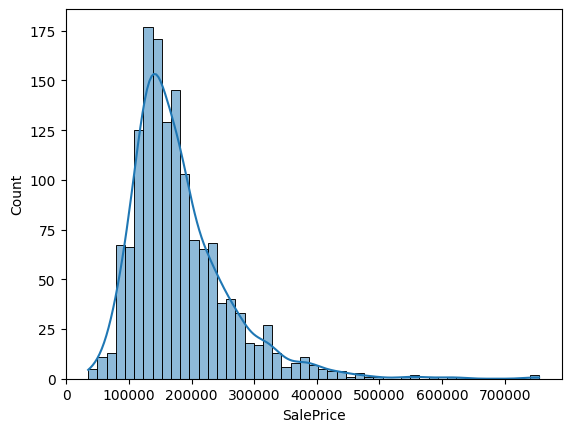

In [12]:
import seaborn as sns
import numpy as np

#Kiem tra phân phối của biến mục tiêu (SalePrice)
sns.histplot(dataset['SalePrice'], kde=True)
dataset['SalePrice'] = np.log1p(dataset['SalePrice'])

In [13]:
from sklearn.preprocessing import StandardScaler

#Chuẩẩn hóa dữ liệu
important_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
x = dataset[important_cols]
y = dataset['SalePrice']


scaler = StandardScaler()
x = scaler.fit_transform(x)



In [14]:
#Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (1022, 5) Val: (144, 5) Test: (294, 5)


In [15]:
#Luu cac tap du lieu
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

# ***MODEL TRAINING***

In [16]:
#Load cac tap du lieu
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')


#Kiểm tra kích thước của các tập dữ liệu
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
print(f"train: {X_train.shape[0]} ({X_train.shape[0]/len(x)*100:.1f}%)")
print(f"validation: {X_val.shape[0]} ({X_val.shape[0]/len(x)*100:.1f}%)")
print(f"test: {X_test.shape[0]} ({X_test.shape[0]/len(x)*100:.1f}%)")



Train: (1022, 5) Val: (144, 5) Test: (294, 5)
train: 1022 (70.0%)
validation: 144 (9.9%)
test: 294 (20.1%)


# **Polynomial Regression**

In [17]:
from sklearn.pipeline import make_pipeline
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def print_metrics(name, y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X.shape[1] - 1)
    rmse = np.sqrt(mse)

    print(f"\n{name} set:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")
    print(f"  Adjusted R²: {adj_r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

def evaluate_model_poly(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    print_metrics('Train', y_train, y_train_pred, X_train)
    print_metrics('Validation', y_val, y_val_pred, X_val)
    print_metrics('Test', y_test, y_test_pred, X_test)


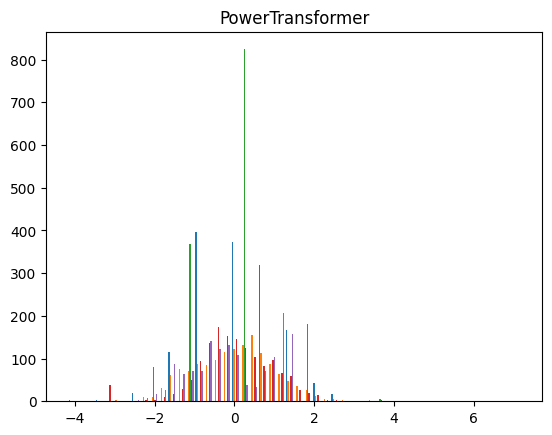

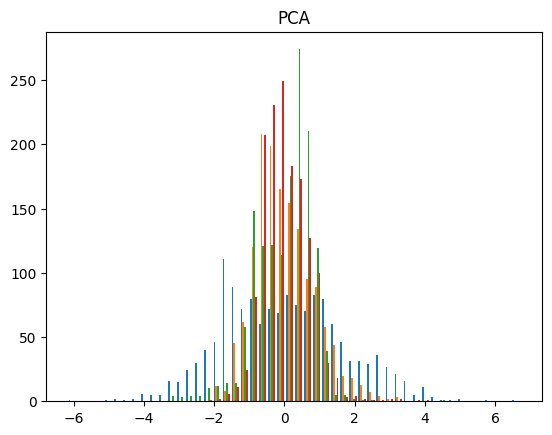

In [19]:
#Giảm chiều dữ liệu với PowerTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data = PowerTransformer().fit_transform(x)
pca = PCA(n_components=0.95)

plt.hist(data, bins=50)
plt.title('PowerTransformer')
plt.show()

plt.hist(pca.fit_transform(data), bins=50)
plt.title('PCA')
plt.show()

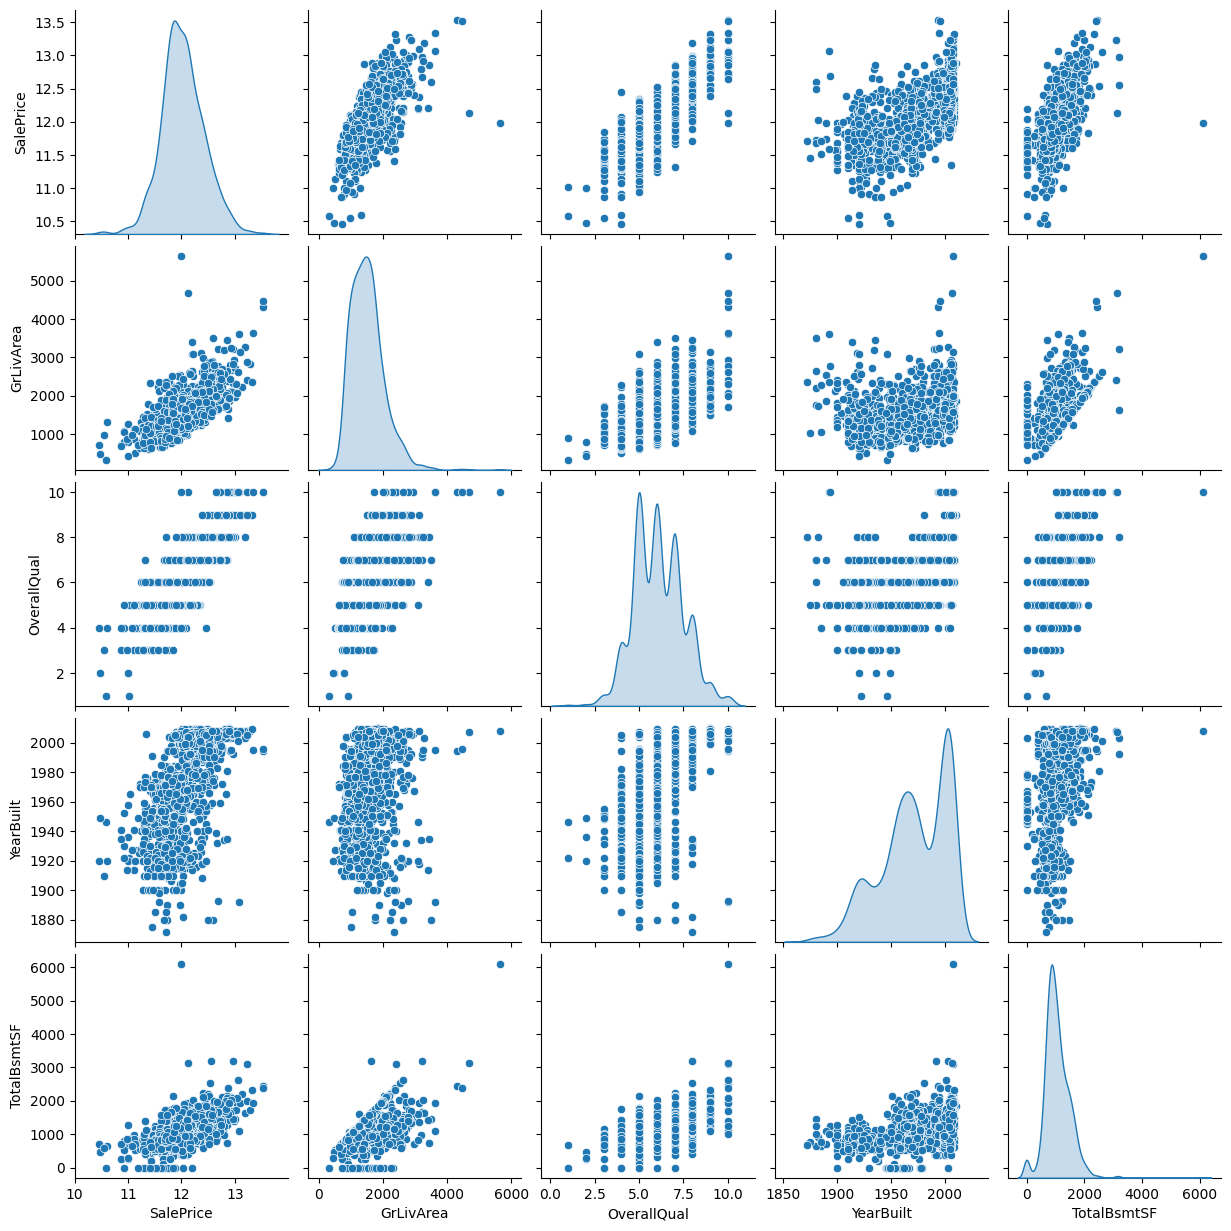

In [20]:

selected_columns = ['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']
sns.pairplot(dataset[selected_columns], diag_kind='kde')

In [21]:
from sklearn.pipeline import Pipeline
# Tạo pipeline với PowerTransformer và LinearRegression
pipeline = Pipeline([
    ('power', PowerTransformer()),
    ('pca', PCA(n_components=0.95)),  # Giữ 95% phương sai
    ('model', LinearRegression())
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán
y_train_pred = pipeline.predict(X_train)
y_val_pred = pipeline.predict(X_val)
y_test_pred = pipeline.predict(X_test)

# In kết quả
print_metrics('Train', y_train, y_train_pred, X_train)
print_metrics('Validation', y_val, y_val_pred, X_val)
print_metrics('Test', y_test, y_test_pred, X_test)




Train set:
  MSE: 0.0290
  MAE: 0.1202
  R²: 0.8126
  Adjusted R²: 0.8117
  RMSE: 0.1704

Validation set:
  MSE: 0.0235
  MAE: 0.1114
  R²: 0.8673
  Adjusted R²: 0.8625
  RMSE: 0.1532

Test set:
  MSE: 0.0289
  MAE: 0.1229
  R²: 0.8227
  Adjusted R²: 0.8196
  RMSE: 0.1700
